### Реализовать численное решение уравнения теплопроводности с помощью метода конечных разностей для представленного выше случая, построить график распределения температуры по толщине пластины.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 1
lmd = 46
Ro = 7800
C = 460
T0 = 300
Tl = 600
Tr = 400
        
delta = 100
time_exp = 60
tau = time_exp / 10000
h = 0.001

In [3]:
T = [T0 for i in range(delta)]
Tn = [T0 for i in range(delta)]
        
T[0] = Tl
T[-1] = Tr
        
Tn[0] = Tl
Tn[-1] = Tr
         
coeff = lmd * tau / Ro / C / (h**2)

In [4]:
def Experiment(T, Tn, coeff, tau, time_exp):
    t = 0
    while t <= time_exp:
        for i in range(1, len(T)-1, 1):
            T[i] = Tn[i] + coeff * (Tn[i+1] - 2 * Tn[i] + Tn[i-1])
        Tn = T.copy()
        t += tau

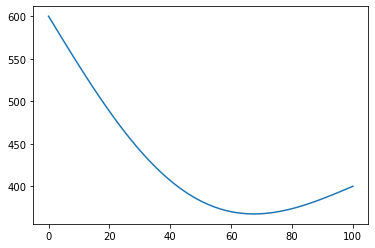

In [5]:
Experiment(T, Tn, coeff, tau, time_exp)

x = np.linspace(0, 100, 100)
y = T

plt.plot(x, y)

In [6]:
L = 0.1
lam = 46
ro = 7800
C = 460
T0 = 300
Tl = 600
Tr = 400

delta = 100
        
timeOfExperience = 60
tau = timeOfExperience / delta
h = L / delta

In [7]:
T = [T0 for i in range(delta)]
T[0] = Tl
T[-1] = Tr
        
alpha = [0 for i in range(delta)]
betta = [T[0] for i in range(delta)] 

In [8]:
def update_AB(i, T, alpha, betta):
    A = C = lam / h**2
    B = 2 * A + C * ro / tau
        
    F = ro * C / tau * T[i]
        
    alpha[i] = A / (B - alpha[i - 1] * C)
    betta[i] = (C * betta[i - 1] - F) / (B - alpha[i - 1] * C)
        
    
def update_temp(delta, T, alpha, betta):
    alpha = [0 for i in range(delta)]
    betta = [T[0] for i in range(delta)]
        
    for i in range(1, len(T)-1, 1):
        update_AB(i, T, alpha, betta)
        
    for i in range(len(T)-2, 0, -1):
        T[i] = alpha[i] * T[i + 1] + betta[i]
        
           
def Experiment2(delta, T, alpha, betta):
    t = 0
    while t <= timeOfExperience:
        update_temp(delta, T, alpha, betta)
        t += tau

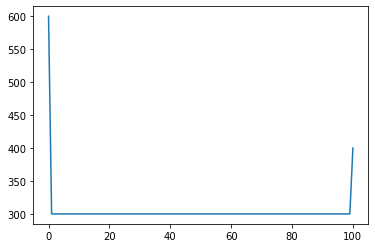

In [9]:
x = np.linspace(0, 100, 100)
y = T
plt.plot(x, y)